# Homework 3
## IRIS data
We want to investigate:
- Is there is a relationship between sepal dimensions and petal dimensions?
  - What can you say about the relationship given the figure?
- How are the sepal and petal dimensions distributed?
  - What can you conclude from this figure?   
- The so called pairs-plot is a very simple way of quickly analysing realtionships between data. Generate the following figure
  - Briefly, mention how the different variables are related to each other.

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df1 = pd.read_csv("IRIS.csv")

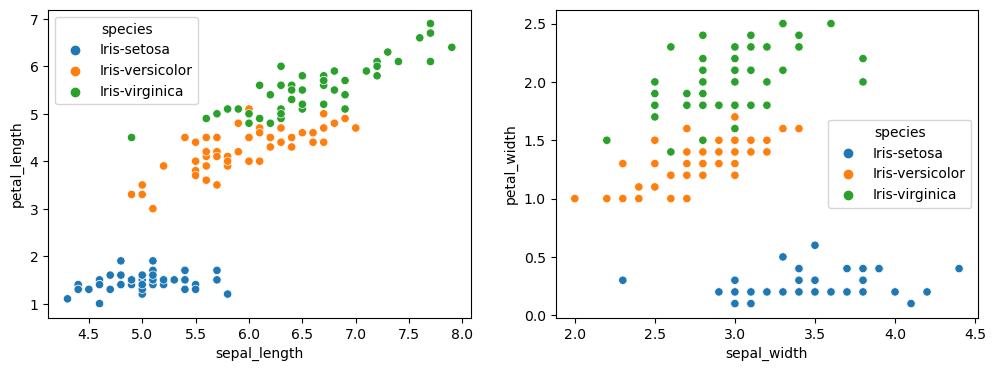

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))  # one row, two columns

# First scatter plot
sns.scatterplot(
    data = df1,
    x ="sepal_length",
    y ="petal_length",
    hue = "species",
    ax = axes[0] # put at position 1, here that is index 0 since python indexing
)

# Second scatter plot
sns.scatterplot(
    data = df1,
    x = "sepal_width",
    y = "petal_width",
    hue = "species",
    ax = axes[1] # put at position 2, here that is index 0 since python indexing
)

plt.show()

What we can tell from this figure is that the species iris-versicolor and iris-virginicia have a much wider petal length and width compared to iris-setosa with iris-virginica having the largest petals. 

As for the sepal length we can see that it is not as straightforward since we see iris setosa has biggest sepal width on average while iris versicolor and iris virginica having much longer sepals with virginica being on top. 

A possible hypothesis we could draw from this is that iris virginica and veriscolor are more closely related compared to iris setosa. We can also say there might be a sligt relationship between sepal dimensions and petal dimensions. 

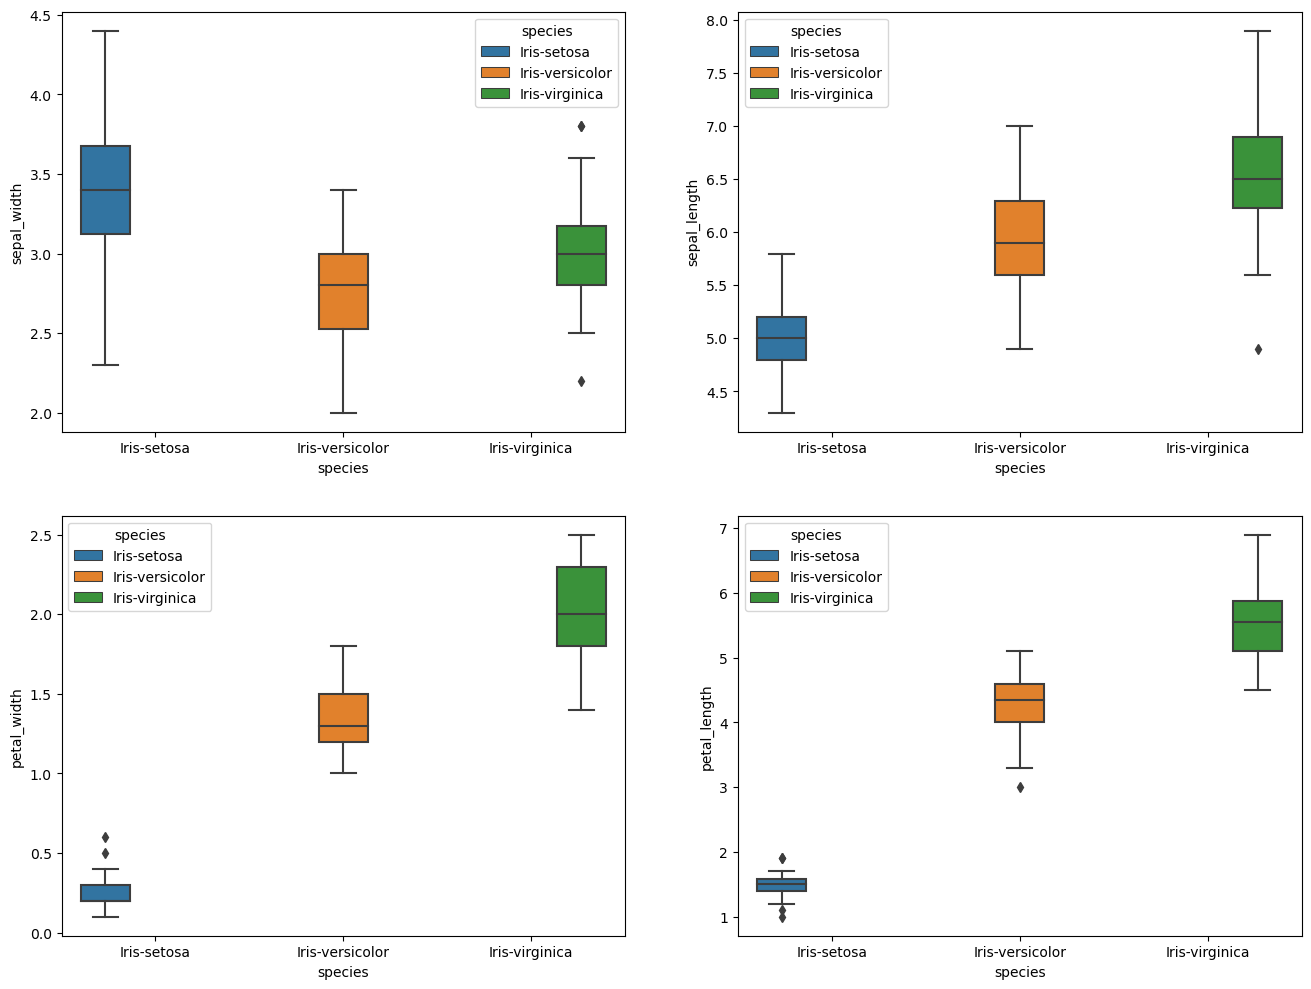

In [5]:
# Create a custom grid of subplots (2 rows, 4 columns)
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Example scatterplots on specific axes
sns.boxplot(
    data=df1,
    x="species",
    y="sepal_width", 
    ax=axes[0, 0],
    hue = "species"
)
sns.boxplot(
    data=df1, 
    x="species", 
    y="sepal_length", 
    ax=axes[0, 1],
    hue = "species"
)


sns.boxplot(
    data=df1, 
    x="species", 
    y="petal_width", 
    ax=axes[1, 0],
    hue = "species"
)
sns.boxplot(
    data=df1, 
    x="species", 
    y="petal_length", 
    ax=axes[1, 1],
    hue = "species"
)

plt.show()

To answer how the sepal and petal dimensions are distributed we can see that the median is roughly the expected value (middle of each respective boxplot) indicating a normal distribution among all the species which is a reasonable conclusion seeing how growth of many things in nature follows a normal distribution. 

c:\Users\sebas\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


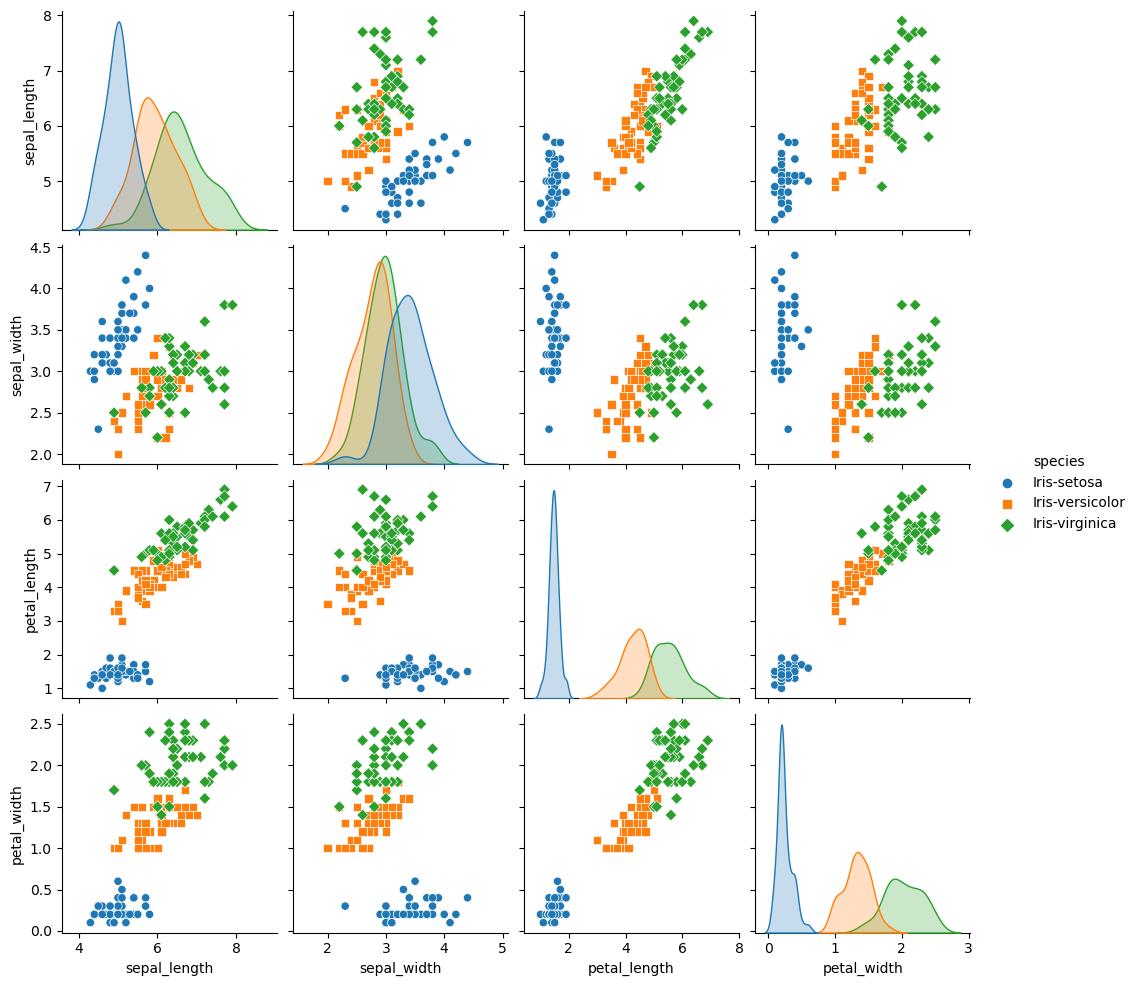

In [6]:
sns.pairplot(df1, hue="species", markers=["o", "s", "D"])

Can see that the petal length and width among iris setosa follows a normal distribution with a much lower expected value compared to the other two. We can however see that sepal length and width are much more alike among the three species. However, even so, among iris setosa we see the sepal length being smaller while sepal width being bigger.

## Birdwatching


Getting to know the dataset provided to us in the "artportalen.csv" file. 

In [7]:
df2 = pd.read_csv("artportalen.csv")
df2.shape

(21916, 27)

In [8]:
df2.columns

Index(['Id', 'Taxonsorteringsordning', 'Rödlistade', 'Artnamn',
       'Vetenskapligt namn', 'Auktor', 'Antal', 'Ålder/stadium', 'Kön',
       'Aktivitet', 'Lokalnamn', 'Ostkoordinat', 'Nordkoordinat',
       'Noggrannhet', 'Diffusion', 'Län', 'Kommun', 'Provins', 'Församling',
       'Startdatum', 'Starttid', 'Slutdatum', 'Sluttid', 'Kommentar', 'Biotop',
       'Rapportör', 'Observatörer'],
      dtype='object')

In [9]:
df2.dtypes

Id                         int64
Taxonsorteringsordning     int64
Rödlistade                object
Artnamn                   object
Vetenskapligt namn        object
Auktor                    object
Antal                     object
Ålder/stadium             object
Kön                       object
Aktivitet                 object
Lokalnamn                 object
Ostkoordinat               int64
Nordkoordinat              int64
Noggrannhet                int64
Diffusion                  int64
Län                       object
Kommun                    object
Provins                   object
Församling                object
Startdatum                object
Starttid                  object
Slutdatum                 object
Sluttid                   object
Kommentar                 object
Biotop                    object
Rapportör                 object
Observatörer              object
dtype: object

In [10]:
df2.describe()

,Id,Taxonsorteringsordning,Ostkoordinat,Nordkoordinat,Noggrannhet,Diffusion
count,2.191600e+04,21916.000000,2.191600e+04,2.191600e+04,21916.000000,21916.0
mean,9.981252e+07,54752.077660,1.629865e+06,6.583355e+06,288.540473,0.0
std,1.072560e+06,513.149522,3.184815e+03,3.052448e+03,413.406928,0.0
min,9.778507e+07,53905.000000,1.622830e+06,6.579964e+06,0.000000,0.0
25%,9.895787e+07,54222.000000,1.626851e+06,6.580712e+06,94.000000,0.0
50%,9.979669e+07,54944.000000,1.630050e+06,6.581857e+06,187.000000,0.0
75%,1.007643e+08,55213.000000,1.633107e+06,6.585409e+06,250.000000,0.0
max,1.015078e+08,55488.000000,1.635000e+06,6.590025e+06,4679.000000,0.0


In [11]:
df2.head()

,Id,Taxonsorteringsordning,Rödlistade,Artnamn,Vetenskapligt namn,Auktor,Antal,Ålder/stadium,Kön,Aktivitet,...,Provins,Församling,Startdatum,Starttid,Slutdatum,Sluttid,Kommentar,Biotop,Rapportör,Observatörer
0,97785066,55235,NaN,Koltrast,Turdus merula,"Linnaeus, 1758",2,NaN,NaN,NaN,...,Uppland,Solna,2022-01-01,NaN,2022-01-01,NaN,NaN,NaN,Björn Lindkvist,Björn Lindkvist
1,97785067,54989,NaN,Blåmes,Cyanistes caeruleus,"(Linnaeus, 1758)",2,NaN,NaN,NaN,...,Uppland,Solna,2022-01-01,NaN,2022-01-01,NaN,NaN,NaN,Björn Lindkvist,Björn Lindkvist
2,97785310,55235,NaN,Koltrast,Turdus merula,"Linnaeus, 1758",1,NaN,NaN,NaN,...,Uppland,Solna,2022-01-01,NaN,2022-01-01,NaN,NaN,NaN,Anders Eriksson,Anders Eriksson
3,97786982,54735,NaN,Sparvhök,Accipiter nisus,"(Linnaeus, 1758)",1,NaN,hona,NaN,...,Uppland,Solna,2022-01-01,NaN,2022-01-01,NaN,NaN,NaN,Anders Eriksson,Anders Eriksson
4,97786985,54944,NaN,Skata,Pica pica,"(Linnaeus, 1758)",2,NaN,NaN,NaN,...,Uppland,Solna,2021-12-30,15:57,2022-01-01,09:36,NaN,NaN,Henrik Spovin,Henrik Spovin


## What are the most prevelant species?

In [12]:
df2["Antal"] = pd.to_numeric(df2["Antal"], errors = "coerce") # force dtype

df2_cleaned = df2.dropna(subset=["Artnamn", "Antal"])  

df2_cleaned["Antal"] = df2_cleaned["Antal"].astype(int)  # Ensure "Antal" is float
total_observations = df2_cleaned.groupby("Artnamn", as_index=False)["Antal"].sum()


most_prevalent_species_sorted = total_observations.nlargest(3, "Antal")
most_prevalent_species_sorted

C:\Users\sebas\AppData\Local\Temp\ipykernel_6352\1539423136.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_cleaned["Antal"] = df2_cleaned["Antal"].astype(int)  # Ensure "Antal" is float


,Artnamn,Antal
42,Grönsiska,20211
119,Sothöna,8308
29,Gräsand,7167


## What is the monthly distribution of the top 3 most prevelant species?

(array([5.200e+03, 4.373e+03, 4.563e+03, 6.183e+03, 1.596e+03, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([ 1. ,  2.1,  3.2,  4.3,  5.4,  6.5,  7.6,  8.7,  9.8, 10.9, 12. ]),
 <BarContainer object of 10 artists>)

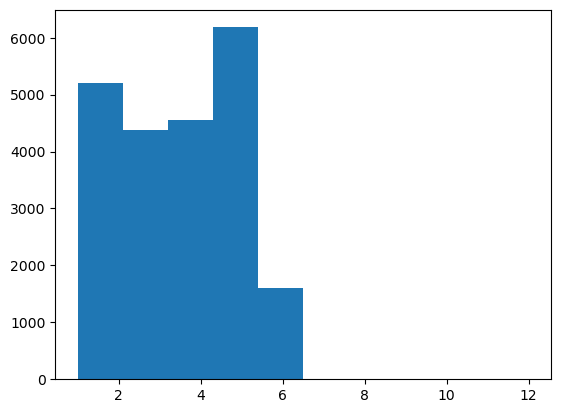

In [13]:
df2["Startdatum"] = pd.to_datetime(df2["Startdatum"], errors="coerce") # force dtype = datetime
df2["Månad"] = df2["Startdatum"].dt.month # group by month, ie 1-12
monthly_group = df2.groupby("Månad").size()

plt.hist(monthly_group.index, weights = monthly_group.values)

# What are the rarest species?

In [14]:
most_prevalent_species_sorted_reverse = total_observations.nsmallest(15,"Antal")
most_prevalent_species_sorted_reverse

,Artnamn,Antal
1,Bivråk,1
11,Bändelkorsnäbb,1
17,Ejder,1
25,Fjällvråk,1
26,Forsärla,1
28,Gravand,1
70,Lappsparv,1
92,"Ormvråk, underarten buteo",1
96,Rosenfink,1
97,Röd glada,1


## What proportion of the observations involve red-listed species
Red-listed species can be categorized as VU (Vulnerable), NT (Near threshold), EN (Endangered), CR (Critically endangered), LC (Least concern), DD (Data deficient).

In [15]:
df2_red = df2["Rödlistade"]
# map value 1 if redlisted, 0 if not (NA)
df2_red_mapped = df2_red.map({"NA" : 0,
                               "VU" : 1,
                               "NT" : 1,
                               "EN" : 1,
                               "CR" : 1,
                               "LC" : 1,
                               "DD" : 1})
total_red_listed = int(df2_red_mapped.sum())
proportion_red_listed = total_red_listed / len(df2_red) # take len due to wanting amount of observations 
print(f"Total red-listed observations: {total_red_listed}")
print(f"Proportion of red-listed observations: {proportion_red_listed:.2%}")

Total red-listed observations: 4777
Proportion of red-listed observations: 21.80%


## Changes in amount of observations of red-listed species
Can plot a histogram to showcase how many red-listed species are observed based on the months.

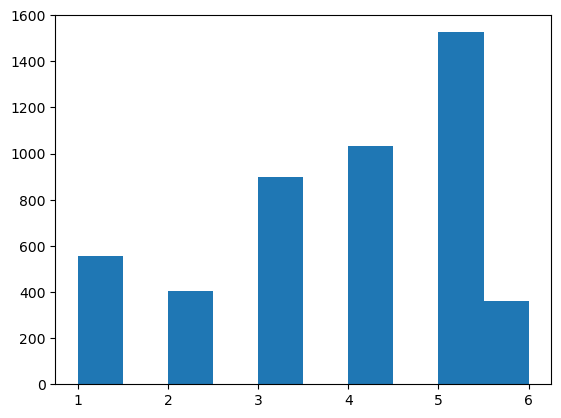

In [16]:
df2["Startdatum"] = pd.to_datetime(df2["Startdatum"], errors="coerce") # force dtype = datetime
df2["Månad"] = df2["Startdatum"].dt.month # group by month, ie 1-12
monthly_group = df2.groupby("Månad").size()

# filter for red listed
red_listed_categories = ["VU", "NT", "EN", "CR", "LC", "DD"]
df2_red_listed = df2[df2["Rödlistade"].isin(red_listed_categories)] # if is in one of categories, add count to df2_red_listed

red_by_month = df2_red_listed.groupby("Månad").size()

plt.hist(red_by_month.index, weights = red_by_month.values) # index = months 1-12 (6 in this case), values = amount of red, weight = count of red
plt.show()


## Which municipality sees most red-listed species?

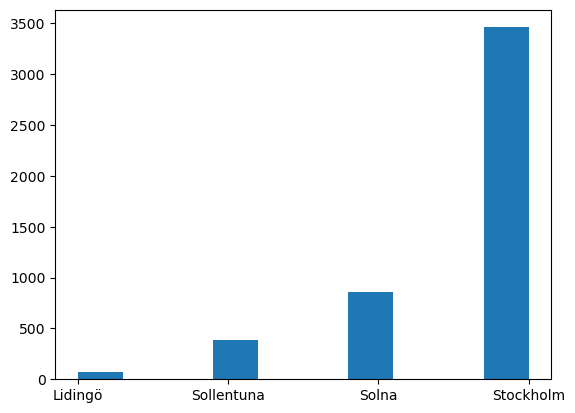

In [ ]:
municipial_group = df2.groupby("Kommun")
red_by_month = df2_red_listed.groupby("Kommun").size()

plt.hist(red_by_month.index, weights = red_by_month.values) # index = months 1-12 (1-6 in this case), values = amount of red, weight = count of red
plt.show()

We see that Stockholm has by far the most observations of red-listed species. This however seems like a contradiction to what we may think of logically, ie. the regions with far more forests and natural habitats should see more of a diversity in the species present. This could be a consequence of the data which only presents these 4 municipilaties. This is in reality a very bad dataset in this case due to being so limited to the Stockholm region.

# Predicting strokes

In [22]:
df3 = pd.read_csv("stroke-data.csv")

df3.head(), df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


(      id  gender   age  hypertension  heart_disease ever_married  \
 0   9046    Male  67.0             0              1          Yes   
 1  51676  Female  61.0             0              0          Yes   
 2  31112    Male  80.0             0              1          Yes   
 3  60182  Female  49.0             0              0          Yes   
 4   1665  Female  79.0             1              0          Yes   
 
        work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
 0        Private          Urban             228.69  36.6  formerly smoked   
 1  Self-employed          Rural             202.21   NaN     never smoked   
 2        Private          Rural             105.92  32.5     never smoked   
 3        Private          Urban             171.23  34.4           smokes   
 4  Self-employed          Rural             174.12  24.0     never smoked   
 
    stroke  
 0       1  
 1       1  
 2       1  
 3       1  
 4       1  ,
 None)

## Do urban or rural populations differ in stroke occurrence?
Plot how many have been affected by stroke in the two populations and see which of the two seems to have a more prevalent risk of having a stroke. 

## How do the factors presented in the dataset differ from urban/rural populations?
Scatterplot with line-average BMI/gender etc... for both of the populations and see how it differs.

## Do the different factors have a more significant effect on the possibility of stroke in urban/rural populations?
Plot heatmap. 

# Cleaning data
- Deal with missing values in a suitable way (fill and/or remove missing values).
- Convert all the **relevant** cells to numbers (not strings).

In [33]:
cell_phones_data = pd.read_csv("cell_phones_total.csv", delimiter = ",")

In [32]:

cell_phones_data.head(), cell_phones_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 57 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   iso-3   214 non-null    object 
 1   1960    200 non-null    float64
 2   1965    200 non-null    float64
 3   1966    0 non-null      float64
 4   1967    0 non-null      float64
 5   1968    0 non-null      float64
 6   1969    0 non-null      float64
 7   1970    200 non-null    float64
 8   1971    0 non-null      float64
 9   1972    0 non-null      float64
 10  1973    0 non-null      float64
 11  1974    0 non-null      float64
 12  1975    200 non-null    float64
 13  1976    200 non-null    float64
 14  1977    200 non-null    float64
 15  1978    200 non-null    float64
 16  1979    200 non-null    float64
 17  1980    200 non-null    object 
 18  1981    199 non-null    object 
 19  1982    199 non-null    object 
 20  1983    198 non-null    object 
 21  1984    196 non-null    object 
 22  19

(  iso-3  1960  1965  1966  1967  1968  1969  1970  1971  1972  ...   2010  \
 0   ABW   0.0   0.0   NaN   NaN   NaN   NaN   0.0   NaN   NaN  ...   132k   
 1   AFG   0.0   0.0   NaN   NaN   NaN   NaN   0.0   NaN   NaN  ...  10.2M   
 2   AGO   0.0   0.0   NaN   NaN   NaN   NaN   0.0   NaN   NaN  ...   9.4M   
 3   ALB   0.0   0.0   NaN   NaN   NaN   NaN   0.0   NaN   NaN  ...  2.69M   
 4   AND   0.0   0.0   NaN   NaN   NaN   NaN   0.0   NaN   NaN  ...  65.5k   
 
     2011   2012   2013   2014   2015   2016   2017   2018   2019  
 0    NaN   135k   139k   140k   141k    NaN    NaN    NaN    NaN  
 1  13.8M  15.3M  16.8M  18.4M  19.7M  21.6M  23.9M    22M  22.6M  
 2  12.1M  12.8M  13.3M  14.1M  13.9M    13M  13.3M  13.3M  14.8M  
 3   3.1M   3.5M  3.69M  3.36M   3.4M  3.37M  3.63M  2.71M  2.63M  
 4    65k  63.9k  63.9k  66.2k  71.3k  76.1k  80.3k  82.6k  87.9k  
 
 [5 rows x 57 columns],
 None)

We see that many years have missing data. Inconsistent formats with suffixes. Inconsistent dtypes, all should be floats. 

In [38]:
cell_phones_cleaned = cell_phones_data.dropna(axis=1)

# convert strings with suffixes (k, M, B) to numeric values, ie multiply by actual numerical value
def convert_to_numeric(value):
    if isinstance(value, str):
        if "k" in value:
            return float(value.replace("k","")) * 1e3
        elif "M" in value:
            return float(value.replace("M", "1")) * 1e6
        elif "B" in value:
            return float(value.replace("B", "1")) * 1e9
        else:
            return np.nan
    return value

# exclude iso-3 column from the remapping
for col in cell_phones_cleaned.columns:
    if col != "iso-3":
        cell_phones_cleaned[col] = cell_phones_cleaned[col].apply(convert_to_numeric)

# sort
cell_phones_cleaned_sorted = cell_phones_cleaned.sort_values(by="2015", ascending=False)
cell_phones_cleaned_sorted

KeyError: '2015'